In [0]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

In [0]:
# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 훈련셋과 검증셋 분리
x_val = x_train[:42000]   # 훈련셋의 30%를 검증셋으로 사용
x_train = x_train[42000:]
y_val = y_train[:42000]   # 훈련셋의 30%를 검증셋으로 사용
y_train = y_train[42000:] 

In [0]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [0]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [14]:
# 4. 모델 학습시키기
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

Train on 18000 samples, validate on 42000 samples
Epoch 1/5
18000/18000 [==============================] - 2s 113us/step - loss: 1.1352 - accuracy: 0.7170 - val_loss: 0.6646 - val_accuracy: 0.8363
Epoch 2/5
18000/18000 [==============================] - 2s 110us/step - loss: 0.5190 - accuracy: 0.8687 - val_loss: 0.4834 - val_accuracy: 0.8705
Epoch 3/5
18000/18000 [==============================] - 2s 110us/step - loss: 0.4159 - accuracy: 0.8863 - val_loss: 0.4189 - val_accuracy: 0.8846
Epoch 4/5
18000/18000 [==============================] - 2s 109us/step - loss: 0.3699 - accuracy: 0.8976 - val_loss: 0.3854 - val_accuracy: 0.8928
Epoch 5/5
18000/18000 [==============================] - 2s 109us/step - loss: 0.3428 - accuracy: 0.9044 - val_loss: 0.3642 - val_accuracy: 0.8975


In [15]:
# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

10000/10000 [==============================] - 0s 22us/step

loss_and_metrics : [0.33625239115357397, 0.90420001745224]


In [0]:
# 6. 모델 저장하기
from keras.models import load_model
model.save('mnist_mlp_model.h5')

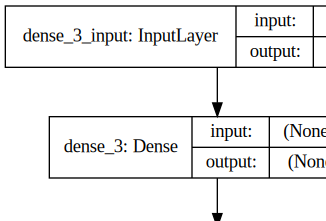

In [17]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
# 1. 실무에 사용할 데이터 준비하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_test = np_utils.to_categorical(y_test)
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]

In [0]:
# 2. 모델 불러오기
from keras.models import load_model
model = load_model('mnist_mlp_model.h5')

In [22]:
# 3. 모델 사용하기
yhat = model.predict_classes(xhat)

for i in range(5):
  print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))

True : 9, Predict : 4
True : 7, Predict : 7
True : 7, Predict : 2
True : 8, Predict : 8
True : 0, Predict : 0
